# Auto Dataset
#### Sam Berkson PA3
Dataset source: PA2  
Note: copy your `auto-data-removed-NA.txt` from PA2 to `input_data/auto-data-removed-NA.txt`

### Data Loading and Prep
In terms of preparing our data for an EDA, there isnt much to do.  The data comes pre-cleaned, so we're almost ready to get rolling.
1. Load in auto-data-removed-NA.txt into a MyPyTable object, storing the data.  
2. Use MyPyTable's remove_rows_with_missing_values() method to eliminate rows with missing values.
3. Drop rows with N/A values

In [16]:
import matplotlib.pyplot as plt
from mypytable import MyPyTable
import plot_utils
import utils
import importlib
# reload utils files
importlib.reload(plot_utils)
importlib.reload(utils)

table = MyPyTable()
table.load_from_file('input_data/auto-data-removed-NA.txt')
table.remove_rows_with_missing_values()

drop_row_indexes = []

# Cleaning up null values
for row in table.data:
    for val in row:
        if val == "N/A":
            drop_row_indexes.append(row[0])
        elif val == "NA":
            drop_row_indexes.append(row[0])
        elif val == "na":
            drop_row_indexes.append(row[0])
        elif val == "n/a":
            drop_row_indexes.append(row[0])
        else:
            continue

table.drop_rows(drop_row_indexes)


### Exploratory Data Analysis
Now that our data is cleaned, we are ready to begin our analysis. Just taking a look at the broad strokes, we can see that we have $321$ entries.  We can also take a peek at the data by analyzing the distribution of our categorical attributes.  First, we'll look at cylinders.

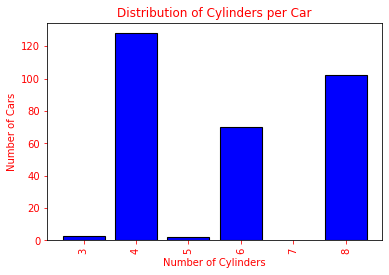

In [17]:
vals, count = utils.get_frequencies(table.get_column('cylinders'))
plot_utils.bar_chart_helper(vals, count, 'Distribution of Cylinders per Car', 'Number of Cylinders', 'Number of Cars')

Here, we can see that the number of cylinders per car is almost exclusively $4$, $6$, or $8$ cylinders. Now, we'll take a look at the distribution of model year by car.

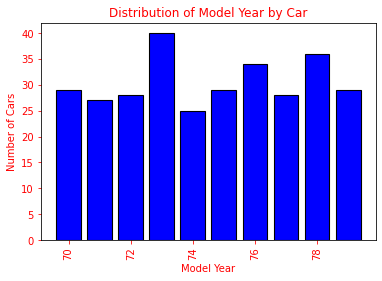

In [18]:
vals, count = utils.get_frequencies(table.get_column('model year'))
plot_utils.bar_chart_helper(vals, count, 'Distribution of Model Year by Car', 'Model Year', 'Number of Cars')

Here, we can see that the distribution is almost even across the board with minor variations, with the biggest gap being $15$ cars between $1974$ and $1973$.  Now, we'll take a look at the distribution of the car's origin.

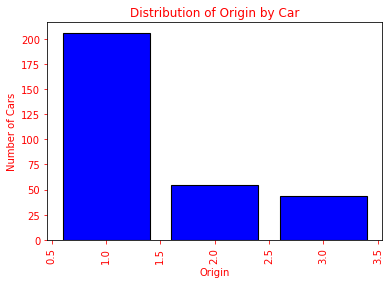

In [19]:
vals, count = utils.get_frequencies(table.get_column('origin'))
plot_utils.bar_chart_helper(vals, count, 'Distribution of Origin by Car', 'Origin', 'Number of Cars')

As you can see, our distribution is very obviously skewed to the right, with the majority of our cars holding an origin value of 1.0.  Now, the next step is to discretize our MPG by using an incremental scale.  The values map to each other as seen below.
|Rating |MPG|
|-|-|
|10 |≥ 45|
|9 |37–44|
|8 |31–36|
|7 |27–30|
|6 |24–26|
|5 |20–23|
|4 |17–19|
|3 |15–16|
|2 |14|
|1 |≤ 13|

Lets take a look at how the distribution ends up.

Average MPG21.078360655737704
Average MPG Rating: 5.101639344262295


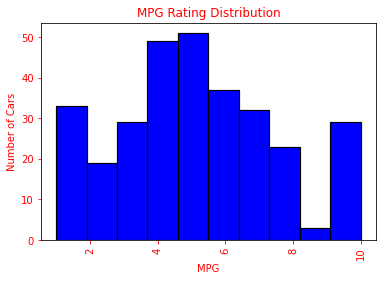

In [20]:
mpg_raw = table.get_column('mpg')
mpg_raw_avg = sum(mpg_raw) / len(mpg_raw)

counter = 0
for row in table.data:
    if row[0] <= 13:
        table.data[counter][0] = 1
    elif row[0] == 14:
        table.data[counter][0] = 2
    elif (row[0] == 15 or row[0] == 16):
        table.data[counter][0] = 3
    elif (row[0] <= 19 and row[0] >= 17):
        table.data[counter][0] = 4
    elif (row[0] <= 23 and row[0] >= 20):
        table.data[counter][0] = 5
    elif (row[0] <= 26 and row[0] >= 24):
        table.data[counter][0] = 6
    elif (row[0] <= 30 and row[0] >= 27):
        table.data[counter][0] = 7
    elif (row[0] <= 36 and row[0] >= 31):
        table.data[counter][0] = 8
    elif (row[0] <= 44 and row[0] >= 37):
        table.data[counter][0] = 9
    else:
        table.data[counter][0] = 10
    counter += 1

MPG = table.get_column('mpg')
mpg_rating_avg = sum(MPG) / len(MPG)
plot_utils.hist_helper(MPG, 'MPG Rating Distribution', 'MPG', 'Number of Cars')
print("Average MPG" + str(mpg_raw_avg))
print("Average MPG Rating: " + str(mpg_rating_avg))

It is a nearly multimodal distribution, centering at a rating of $5.1$, or $21.1$ miles per galon.  Our other common values pop up on the edges, with a rating of either $1$ or $10$.  This is natural, particularly considering the wide range of cars we're looking at.  Especially with older cars, it is natural to get a heavier weight towards the lower end of the MPG spectrum. Next, we will look at the distribution of displacement over each car.

Average displacement: 213.5360655737705


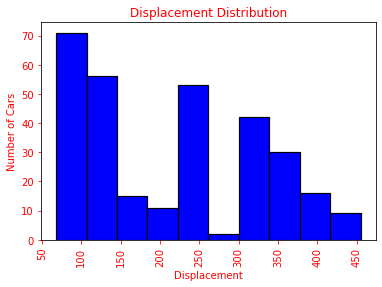

In [21]:
displacement = table.get_column('displacement')
plot_utils.hist_helper(displacement, 'Displacement Distribution', 'Displacement', 'Number of Cars')
displacement_avg = sum(displacement) / len(displacement)
print("Average displacement: " + str(displacement_avg))

Our displacement distribution is bimodal, with an average of $213.5$ but with peaks around $100$ and $250$, as well as $325$.  Next, we will take a look at the distribution of horsepower over our dataset.

Average horsepower: 111.3344262295082


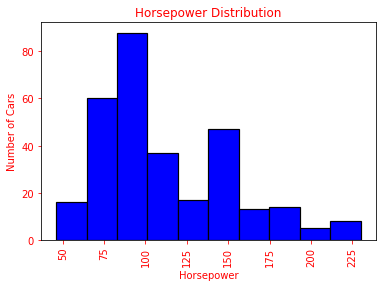

In [22]:
horsepower = table.get_column('horsepower')
plot_utils.hist_helper(horsepower, 'Horsepower Distribution', 'Horsepower', 'Number of Cars')
horsepower_avg = sum(horsepower) / len(horsepower)
print("Average horsepower: " + str(horsepower_avg))

Our horsepower distribution is roughly right skewed, with an average of $111.3$ over the entire dataset. Again, this makes sense with the wide range of cars we have.  Not a whole lot of muscle cars, that's for sure. Next, we'll look at the distribution of weight for our dataset.

Average weight: 3121.4590163934427


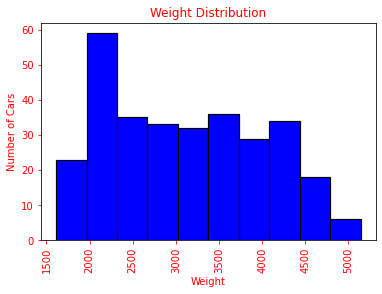

In [23]:
weight = table.get_column('weight')
plot_utils.hist_helper(weight, 'Weight Distribution', 'Weight', 'Number of Cars')
weight_avg = sum(weight) / len(weight)
print("Average weight: " + str(weight_avg))

I believe that you could classify this attribute as uniform or right-skewed, and that the arguments for both are valid.  Here, however, I will argue that the distribution is uniform.  The peak bin is nearly $25$ cars higher than either side,  and the variation between other bins is minimal.  I think it makes sense when taking a peak at the actual cars in our dataset, as theres a good mix of heavy cars and smaller, lighter ones.  Next, we'll take a look at the distribution of our acceleration.

Average acceleration: 15.246885245901622


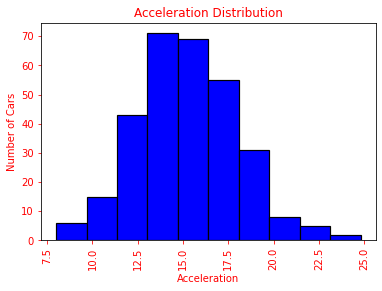

In [24]:
acceleration = table.get_column('acceleration')
plot_utils.hist_helper(acceleration, 'Acceleration Distribution', 'Acceleration', 'Number of Cars')
acceleration_avg = sum(acceleration) / len(acceleration)
print("Average acceleration: " + str(acceleration_avg))

Our acceleration distribution is unimodal.  Not a ton to be said about it, besides the fact that there arent any super jumpy cars on our list.  Next, we'll look at the distribution of MSRP scores throughout our dataset.

Average MSRP: 4164.363750230248


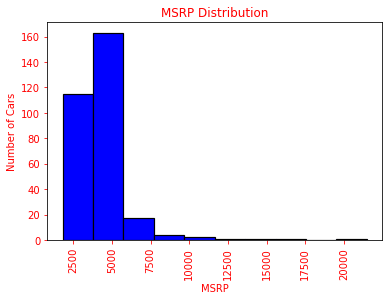

In [25]:
msrp = table.get_column('msrp')
plot_utils.hist_helper(msrp, 'MSRP Distribution', 'MSRP', 'Number of Cars')
msrp_avg = sum(msrp) / len(msrp)
print("Average MSRP: " + str(msrp_avg))

Right skewed. Not a lot of other ways to describe this distribution. It makes sense when in the context of pricing, however.  We have an average price of $4164.36$ (dollars) which, all things being equal, isnt that bad.  Now, we'll move towards comparing our attributes to our MPG ratings.

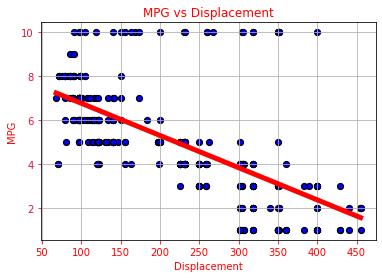

In [26]:
plot_utils.scatter_plot_helper(displacement, MPG, 'MPG vs Displacement', 'Displacement', 'MPG')

There is a strong inverse relationship between MPG and displacement, as shown by its negative correlation coefficient.  Next, we'll look at MPG and horsepower.

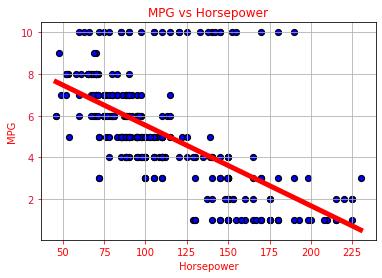

In [27]:
plot_utils.scatter_plot_helper(horsepower, MPG, 'MPG vs Horsepower', 'Horsepower', 'MPG')

There is a very strong inverse relationship between MPG and horsepower, as shown by its negative correlation coefficient.  Next, we'll take a look at MPG and weight.

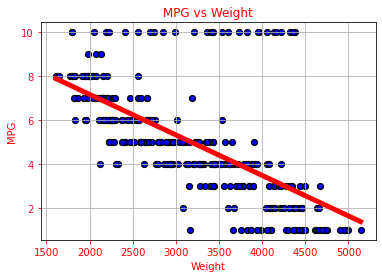

In [28]:
plot_utils.scatter_plot_helper(weight, MPG, 'MPG vs Weight', 'Weight', 'MPG')

There is a very strong inverse relationship between MPG and weight, as shown by its negative correlation coefficient.  Next, we'll take a look at MPG and acceleration.

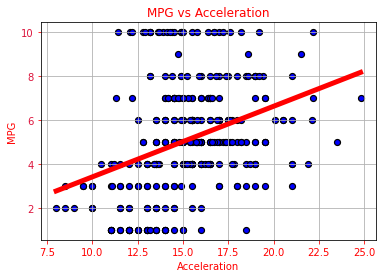

In [29]:
plot_utils.scatter_plot_helper(acceleration, MPG, 'MPG vs Acceleration', 'Acceleration', 'MPG')

There is a solid relationship between MPG and acceleration, as shown by its positive correlation coefficient.  Finally, we'll take a look at MPG and MSRP.

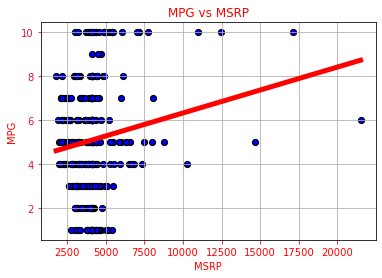

In [30]:
plot_utils.scatter_plot_helper(msrp, MPG, 'MPG vs MSRP', 'MSRP', 'MPG')

There is a relationship between MSRP, although it is not as strong as the inverse relationships between MPG and weight, as well as MPG and horsepower.